# Impoting libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

Read start up funding cvs file (the data is from 2015 to 2017)

In [2]:
data = pd.read_csv("startup_funding.csv")

In [3]:
# checking data, display first four rows of dataframe
data.head(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [4]:
data.tail(4) #display last 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [5]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [6]:
print('Rows {rows} and Columns {columns}'.format(rows=data.shape[0],columns=data.shape[1]))

Rows 2372 and Columns 10


# Identifying and cleaning Missing Values

In [7]:
missing_values_count = data.isnull().sum()

In [8]:
missing_values_count[0:10]

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

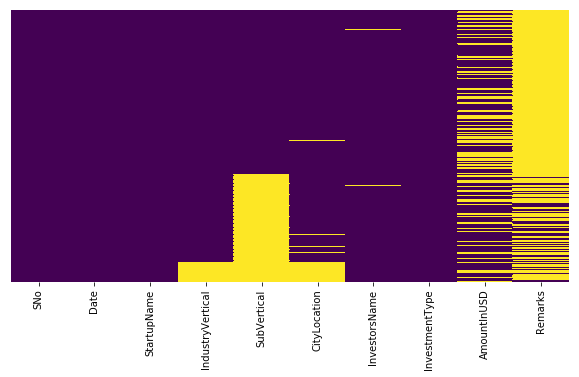

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [10]:
newdata=data.copy() # creating a copy to update the dataset 

In [11]:
newdata['CityLocation']=newdata['CityLocation'].fillna(value='NotSpecified')

In [12]:
newdata['IndustryVertical']=newdata['IndustryVertical'].fillna(value='Other')

We don't need SNo and remarks columns for our project, so we are deleting them

In [13]:
del newdata['Remarks']
del newdata['SNo']

AmountInUSD is not in integer, it has ','. So we will remove ',' and format into integer using regular expressions

In [14]:
import re;
def replace_comma_with_emptySpace(x):
    if re.search(',',x): 
        return (x.replace(',',''))
    return x
newdata['AmountInUSD']=newdata[newdata['AmountInUSD'].notnull()]['AmountInUSD'].apply(replace_comma_with_emptySpace).astype('int')

In [15]:
newdata['AmountInUSD']=round(newdata['AmountInUSD'].fillna(np.mean(newdata['AmountInUSD'])))

In [16]:
newdata['InvestmentType'].value_counts().index

Index(['Seed Funding', 'Private Equity', 'SeedFunding', 'Debt Funding',
       'Crowd Funding', 'PrivateEquity', 'Crowd funding'],
      dtype='object')

In [17]:
newdata['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

In [18]:
newdata['InvestmentType']= [x.replace(' ', '').lower() for x in newdata['InvestmentType']]

In [19]:
newdata['InvestmentType'].value_counts().index

Index(['seedfunding', 'privateequity', 'crowdfunding', 'debtfunding'], dtype='object')

In [20]:
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()
    if   re.search('/',x):
        return x.split('/')[0].strip()
    else :
        return x.strip()
newdata['CityLocation']=newdata['CityLocation'].apply(convert_Slash)

newdata['CityLocation'].value_counts().index

Index(['bangalore', 'mumbai', 'new delhi', 'gurgaon', 'notspecified', 'pune',
       'noida', 'hyderabad', 'chennai', 'ahmedabad', 'jaipur', 'kolkata',
       'chandigarh', 'vadodara', 'indore', 'goa', 'singapore', 'kanpur',
       'delhi', 'coimbatore', 'siliguri', 'us', 'agra', 'udupi', 'trivandrum',
       'bhopal', 'usa', 'kochi', 'gwalior', 'belgaum', 'lucknow', 'panaji',
       'sfo', 'jodhpur', 'seattle', 'dallas', 'london', 'karur', 'varanasi',
       'kerala', 'missourie', 'kozhikode', 'india', 'hubli', 'surat',
       'new york', 'boston', 'nagpur', 'udaipur'],
      dtype='object')

In [21]:
newdata['IndustryVertical'].value_counts().index

Index(['Consumer Internet', 'Technology', 'Other', 'eCommerce', 'ECommerce',
       'Healthcare', 'Logistics', 'Education', 'Food & Beverage', 'Finance',
       ...
       'Big Data Analytics Platform', 'Ethnic/ Traditional Fashion Store',
       'Real Estate Broker Platform App',
       'coupons and cashback aggregator app',
       'Budget Hotel accommodation brand',
       'Picture creation & Social mobile app', 'ECommerce platform solutions',
       'Mobile Learning Solutions', 'Online Insurance Distribution Platform',
       'Hyperlocal grocery delivery'],
      dtype='object', length=744)

In [22]:
def calculate_n_investors(x):
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdata['NumberOfInvestors']=newdata['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)

In [23]:

def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):
        return x.replace('.','')
    return x
newdata['Date']=newdata['Date'].apply(rem_err_date)
newdata['Date'].replace('12/052015','12/05/2015',inplace=True)
newdata['Date'].replace('15/012015','15/01/2015',inplace=True)
newdata['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdata['Date'].replace('13/042015','13/04/2015',inplace=True)

In [42]:
from datetime import datetime
 
year = lambda x: datetime.strptime(x, "%d/%m/%Y" ).year
newdata['Year'] = newdata['Date'].map(year)

In [25]:
from datetime import datetime
 
month = lambda x: datetime.strptime(x, "%d/%m/%Y" ).month
newdata['Month'] = newdata['Date'].map(month)

In [26]:
newdata = pd.get_dummies(newdata, columns=['InvestmentType'], prefix = ['InvestmentType'])

# Modeling

In [32]:
label = newdata['AmountInUSD']
features = newdata.drop('AmountInUSD', axis=1)
del features['Date']
del features['InvestorsName']
del features['StartupName']
del features['IndustryVertical']
del features['CityLocation']
del features['SubVertical']

In [33]:
newdata.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,AmountInUSD,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,1300000.0,1,2017,8,0,0,1,0
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,12031073.0,1,2017,8,0,0,1,0
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",12031073.0,7,2017,8,0,0,0,1
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",500000.0,4,2017,8,0,0,0,1
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",850000.0,2,2017,8,0,0,0,1


In [34]:
features.tail(4)

,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding
2368,1,2015,1,0,0,1,0
2369,2,2015,1,0,0,1,0
2370,1,2015,1,0,0,1,0
2371,1,2015,1,0,0,0,1


In [35]:
label.tail(4)

2368      825000.0
2369     1500000.0
2370    12031073.0
2371      140000.0
Name: AmountInUSD, dtype: float64

In [36]:
from sklearn.svm import LinearSVC
# LinearSVC model applied with simple feature engineering 
svc_clf_1 = LinearSVC()
svc_clf_1.fit(features, label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_clf_1, features, label, cv=4, scoring="accuracy")

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


array([0.26767677, 0.0221843 , 0.19186047, 0.25523013])

In [49]:
from sklearn.svm import SVC
svc_clf_2 = SVC()
svc_clf_2.fit(features, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
cross_val_score(svc_clf_2, features, label, cv=3, scoring="accuracy")

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.29509906, 0.37852349, 0.23652695])

In [51]:
# using kernel = polynomial
svc_clf_3 = SVC(kernel='poly', degree=2)
svc_clf_3.fit(features, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
cross_val_score(svc_clf_3, features, label, cv=3, scoring="accuracy")

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.03023983, 0.37718121, 0.00898204])

# Using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [54]:
svc_params = [
   { 'C': [0.001, 0.01, 0.1, 1, 5, 10], 
     'gamma' : [0.001, 0.01, 0.1],
   },
]
clf = GridSearchCV(svc_clf_3, svc_params, cv=5)
clf.fit(features, label)

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10], 'gamma': [0.001, 0.01, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
#You can access the best score and the best model from the grid search: 
print("Best score: {}".format(clf.best_score_))
print("Optimal params: {}".format(clf.best_estimator_))

Best score: 0.35708263069139967
Optimal params: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [65]:
# Fine tuning hyper-parameters with GridSearchCV
dt_params = [
   { 'max_depth': [1, 2, 4, 8, 16, 32, 64], 
     'min_samples_leaf' : [1, 2, 3, 4, 5, 6],
   }
]

In [66]:
dt_cv = GridSearchCV(estimator=dt, param_grid=dt_params, cv=4)
dt_cv.fit(features, label)

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 4, 8, 16, 32, 64], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
cross_val_score(dt_cv.best_estimator_, features, label, cv=3, scoring="accuracy")

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.29509906, 0.37852349, 0.02694611])

# Random forest classifier

In [57]:
# random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forrest_params = dict(
   max_depth = [n for n in range(9, 14)],
   min_samples_split = [n for n in range(4, 11)],
   min_samples_leaf = [n for n in range(2, 5)],
   n_estimators = [n for n in range(10, 60, 10)],
)
rclf = RandomForestClassifier(n_estimators=10, max_depth=9,random_state=0)
rclf.fit(features, label)

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Using Decission Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
features_small = features.iloc[:500]
label_small = label.iloc[:500]

In [63]:
dt = DecisionTreeClassifier()
dt.fit(features_small, label_small)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
cross_val_score(dt, features_small, label_small, cv=3, scoring="accuracy")

C:\Users\Siri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.11336032, 0.05517241, 0.03703704])

# Ada Boost Classifier

In [68]:
from sklearn.ensemble import AdaBoostClassifier
bdt_clf = AdaBoostClassifier(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))
bdt_clf.fit(features, label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)